In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# train
import pandas as pd
total=pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv',index_col=0)
train_set = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/new_train_set.csv')

df2 = total.groupby(['고객번호','분기'])[['구매금액']].sum().reset_index()
df3=df2.pivot('고객번호','분기','구매금액')
df3=df3.reset_index()
df4=df3[df3.isna( ).any(axis=1)]
cus_list=df4.고객번호.unique()
cus_list=cus_list.tolist()
df3=df3[~df3['고객번호'].isin(cus_list)]

a_7=df3[7].sum()
a_1=df3[1].sum()

year=(((a_7/a_1)**(1/6))-1)*100
year

df3['연평균성장률']=(((df3[7]/df3[1])**(1/6))-1)*100

import numpy as np
df3['target']=np.where(df3['연평균성장률']>year,1,0)
df3['연평균성장률']=(((df3[6]/df3[1])**(1/5))-1)*100
df4=df3[['고객번호','target','연평균성장률']]

train_set.drop('target',axis=1,inplace=True)

train_set_2 = pd.merge(train_set,df4)

In [ ]:
train_set_2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률
0,1,0,1,6,0,3,0,1,5,5,...,0.0,1.4,4.2,1.8,1.2,1.4,1.6,2.6,0,-1.224629
1,2,0,2,6,0,3,0,1,5,5,...,-3.0,-0.2,0.8,0.0,-2.4,2.6,2.4,-2.2,0,-7.996814
2,3,0,1,6,0,0,0,2,3,1,...,0.4,0.8,0.0,0.8,0.8,0.4,0.0,1.2,1,0.664081
3,4,1,1,6,0,2,0,4,2,3,...,3.0,4.4,1.2,10.2,3.0,3.2,1.2,4.4,1,7.947751
4,6,1,4,6,0,0,0,4,5,4,...,-1.8,3.4,0.2,0.8,-0.4,6.6,1.8,4.0,1,5.040894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,...,2.0,-0.6,-2.4,0.0,0.8,-0.6,-4.2,1.2,0,-2.022324
18862,19334,0,7,3,1,3,0,1,4,3,...,1.2,1.4,4.6,4.2,2.4,2.0,5.8,4.8,0,-1.654216
18863,19335,1,14,3,1,0,0,2,3,3,...,5.2,4.4,0.8,2.2,4.6,5.0,1.8,0.8,1,24.920909
18864,19336,1,1,3,0,0,0,1,2,4,...,2.6,8.4,3.6,0.0,1.6,8.8,2.0,0.0,1,51.810682


In [ ]:
train_set_2['연평균성장률']=train_set_2['연평균성장률']/10
train_set_2.drop('총구매지수',inplace=True,axis=1)
train_set_2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률
0,1,0,1,6,0,3,0,1,5,5,...,0.0,1.4,4.2,1.8,1.2,1.4,1.6,2.6,0,-0.122463
1,2,0,2,6,0,3,0,1,5,5,...,-3.0,-0.2,0.8,0.0,-2.4,2.6,2.4,-2.2,0,-0.799681
2,3,0,1,6,0,0,0,2,3,1,...,0.4,0.8,0.0,0.8,0.8,0.4,0.0,1.2,1,0.066408
3,4,1,1,6,0,2,0,4,2,3,...,3.0,4.4,1.2,10.2,3.0,3.2,1.2,4.4,1,0.794775
4,6,1,4,6,0,0,0,4,5,4,...,-1.8,3.4,0.2,0.8,-0.4,6.6,1.8,4.0,1,0.504089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,5,5,1,...,2.0,-0.6,-2.4,0.0,0.8,-0.6,-4.2,1.2,0,-0.202232
18862,19334,0,7,3,1,3,0,1,4,3,...,1.2,1.4,4.6,4.2,2.4,2.0,5.8,4.8,0,-0.165422
18863,19335,1,14,3,1,0,0,2,3,3,...,5.2,4.4,0.8,2.2,4.6,5.0,1.8,0.8,1,2.492091
18864,19336,1,1,3,0,0,0,1,2,4,...,2.6,8.4,3.6,0.0,1.6,8.8,2.0,0.0,1,5.181068


In [ ]:
# test

test_set = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/new_test_set.csv')
test_set

a_1=df3[1].sum()
a_8=df3[8].sum()
year=(((a_8/a_1)**(1/7))-1)*100
df3['연평균성장률']=(((df3[8]/df3[1])**(1/7))-1)*100
df5=df3.copy()
df5['target']=np.where(df5['연평균성장률']>year,1,0)
df5['연평균성장률']=(((df5[7]/df3[1])**(1/6))-1)*100
df6=df5[['고객번호','target','연평균성장률']]
df6

test_set.drop('target',axis=1,inplace=True)
test_set_2=pd.merge(test_set,df6)

In [ ]:
test_set_2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률
0,1,0,1,6,0,3,0,1,5,5,...,-2.4,0.8,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810
1,2,0,2,6,0,3,0,2,4,5,...,-1.0,2.8,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226
2,3,0,1,6,0,0,0,1,2,1,...,0.4,0.8,0.0,1.8,0.8,0.4,0.0,4.2,0,5.648077
3,4,1,1,6,0,2,0,4,3,3,...,2.4,3.2,4.2,11.2,4.0,3.2,5.2,7.4,0,8.419210
4,6,1,4,6,0,0,0,4,5,4,...,4.2,4.4,1.2,1.8,0.6,6.6,1.8,8.0,1,8.419641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,1.4,-0.6,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-13.772816
18862,19334,0,7,3,1,3,0,1,3,2,...,0.6,3.4,7.6,3.6,0.6,0.8,4.6,4.2,0,-8.642034
18863,19335,1,14,3,1,0,0,3,3,3,...,3.4,4.4,0.8,1.6,4.6,3.2,2.8,0.8,1,8.779073
18864,19336,1,1,3,0,0,0,1,1,4,...,4.6,8.4,8.6,0.0,2.6,7.6,4.0,0.0,1,55.360192


In [ ]:
test_set_2['연평균성장률']=test_set_2['연평균성장률']/10
test_set_2.drop('총구매지수',inplace=True,axis=1)
test_set_2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률
0,1,0,1,6,0,3,0,1,5,5,...,-2.4,0.8,0.0,-3.6,0.6,1.4,0.4,0.2,0,-0.259681
1,2,0,2,6,0,3,0,2,4,5,...,-1.0,2.8,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.033423
2,3,0,1,6,0,0,0,1,2,1,...,0.4,0.8,0.0,1.8,0.8,0.4,0.0,4.2,0,0.564808
3,4,1,1,6,0,2,0,4,3,3,...,2.4,3.2,4.2,11.2,4.0,3.2,5.2,7.4,0,0.841921
4,6,1,4,6,0,0,0,4,5,4,...,4.2,4.4,1.2,1.8,0.6,6.6,1.8,8.0,1,0.841964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,1.4,-0.6,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-1.377282
18862,19334,0,7,3,1,3,0,1,3,2,...,0.6,3.4,7.6,3.6,0.6,0.8,4.6,4.2,0,-0.864203
18863,19335,1,14,3,1,0,0,3,3,3,...,3.4,4.4,0.8,1.6,4.6,3.2,2.8,0.8,1,0.877907
18864,19336,1,1,3,0,0,0,1,1,4,...,4.6,8.4,8.6,0.0,2.6,7.6,4.0,0.0,1,5.536019


## DT 전체그림

In [ ]:
train2=train_set_2.copy()
test2=test_set_2.copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier()

X_train = train2.loc[:, train2.columns != 'target']
X_train = X_train.iloc[:,1:]
y_train = train2[['target']]
X_test = test2.loc[:, test2.columns != 'target']
X_test = X_test.iloc[:,1:]
y_test = test2[['target']]

y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 4, 10], 'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

best_dclf = grid_dclf.best_estimator_

pred = best_dclf.predict(X_test)
acc_dt = accuracy_score(y_test, pred)

print(best_dclf)
print('최고 정확도: ', grid_dclf.best_score_)
print('DecisionTreeClassifier 정확도: ', acc_dt)

best_dt_clf = DecisionTreeClassifier(max_depth=4)
best_dt_clf.fit(X_train, y_train)
dt_pred = best_dt_clf.predict(X_test)
print('정확도: ', accuracy_score(y_test, dt_pred).round(4))

DecisionTreeClassifier(max_depth=4)
최고 정확도:  0.7562290061689823
DecisionTreeClassifier 정확도:  0.7163150641365419
정확도:  0.7163


In [ ]:
best_dt_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00203213, 0.02409373, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00212308, 0.        , 0.        ,
       0.        , 0.02116402, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00659826,
       0.        , 0.        , 0.        , 0.94398879])

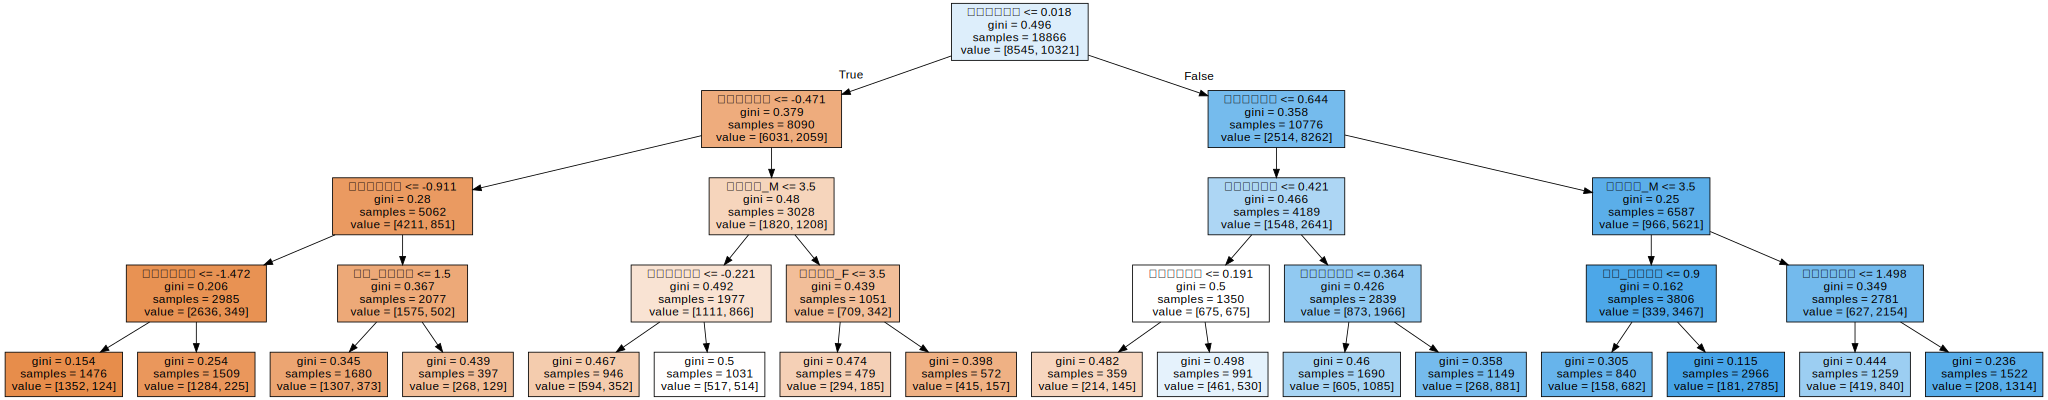

In [ ]:
import sklearn
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(best_dt_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
test2['label'] = dt_pred
test2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,label
0,1,0,1,6,0,3,0,1,5,5,...,0.8,0.0,-3.6,0.6,1.4,0.4,0.2,0,-0.259681,0
1,2,0,2,6,0,3,0,2,4,5,...,2.8,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.033423,0
2,3,0,1,6,0,0,0,1,2,1,...,0.8,0.0,1.8,0.8,0.4,0.0,4.2,0,0.564808,1
3,4,1,1,6,0,2,0,4,3,3,...,3.2,4.2,11.2,4.0,3.2,5.2,7.4,0,0.841921,1
4,6,1,4,6,0,0,0,4,5,4,...,4.4,1.2,1.8,0.6,6.6,1.8,8.0,1,0.841964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,-0.6,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-1.377282,0
18862,19334,0,7,3,1,3,0,1,3,2,...,3.4,7.6,3.6,0.6,0.8,4.6,4.2,0,-0.864203,0
18863,19335,1,14,3,1,0,0,3,3,3,...,4.4,0.8,1.6,4.6,3.2,2.8,0.8,1,0.877907,1
18864,19336,1,1,3,0,0,0,1,1,4,...,8.4,8.6,0.0,2.6,7.6,4.0,0.0,1,5.536019,1


In [ ]:
cluster=test2[test2['label']==0].reset_index(drop=True)
cluster

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,label
0,1,0,1,6,0,3,0,1,5,5,...,0.8,0.0,-3.6,0.6,1.4,0.4,0.2,0,-0.259681,0
1,2,0,2,6,0,3,0,2,4,5,...,2.8,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.033423,0
2,7,1,1,6,0,1,1,2,2,5,...,1.0,5.0,1.2,-1.4,0.4,0.0,1.4,1,-1.763857,0
3,10,1,1,6,0,0,0,3,5,3,...,2.6,2.2,1.2,0.0,4.6,4.2,-1.8,0,-0.259288,0
4,11,0,2,6,1,1,0,4,3,5,...,-1.8,-1.0,-5.4,0.4,-1.2,-0.6,-4.2,1,-1.869347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,1,4,1,0,0,1,3,5,...,0.0,0.4,6.8,-0.2,0.4,1.0,1.2,0,-1.194635,0
9020,19325,1,12,4,0,0,0,2,3,3,...,4.0,5.8,-1.8,2.8,4.6,4.4,1.8,0,-0.906757,0
9021,19327,0,1,5,1,0,0,1,5,1,...,0.0,-0.8,2.2,-2.2,0.0,2.4,4.2,0,-0.953285,0
9022,19333,1,0,2,1,0,1,2,4,1,...,-0.6,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-1.377282,0


In [ ]:
cluster2=test2[test2['label']==1].reset_index(drop=True)
cluster2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,label
0,3,0,1,6,0,0,0,1,2,1,...,0.8,0.0,1.8,0.8,0.4,0.0,4.2,0,0.564808,1
1,4,1,1,6,0,2,0,4,3,3,...,3.2,4.2,11.2,4.0,3.2,5.2,7.4,0,0.841921,1
2,6,1,4,6,0,0,0,4,5,4,...,4.4,1.2,1.8,0.6,6.6,1.8,8.0,1,0.841964,1
3,8,0,1,6,0,2,0,4,4,5,...,4.8,10.2,10.2,3.2,5.8,7.0,1.8,1,0.329797,1
4,9,1,2,6,0,0,0,1,4,5,...,-0.4,3.6,0.0,2.0,2.2,0.4,2.0,1,0.744207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,19331,1,1,6,0,0,0,2,3,3,...,4.4,0.4,4.6,8.6,3.6,0.4,3.0,1,4.046914,1
9838,19332,1,13,3,0,0,0,4,5,3,...,0.0,1.6,6.2,0.6,0.0,3.2,4.4,0,0.509857,1
9839,19335,1,14,3,1,0,0,3,3,3,...,4.4,0.8,1.6,4.6,3.2,2.8,0.8,1,0.877907,1
9840,19336,1,1,3,0,0,0,1,1,4,...,8.4,8.6,0.0,2.6,7.6,4.0,0.0,1,5.536019,1


## DT 군집별 그림
연평균성장률	식품구매비중	식품_방문지수	고가_방문지수

In [ ]:
cluster_1=cluster[['고객번호', '성별', '연령대','Recency_R',
       '구매횟수_F', '구매금액_M','연평균성장률','식품구매비중','식품_방문지수','고가_방문지수']]
cluster_1

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수
0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2
1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4
2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0
3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6
4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2
...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,4,1,3,5,-1.194635,0.041125,-0.2,0.4
9020,19325,1,4,2,3,3,-0.906757,0.352661,2.8,1.6
9021,19327,0,5,1,5,1,-0.953285,0.878719,-2.2,1.6
9022,19333,1,2,2,4,1,-1.377282,0.919496,-1.0,1.2


In [ ]:
import matplotlib.pyplot as plt
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(8*n_cols, 8), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=1000, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','P','D','H']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()
    return dataframe 

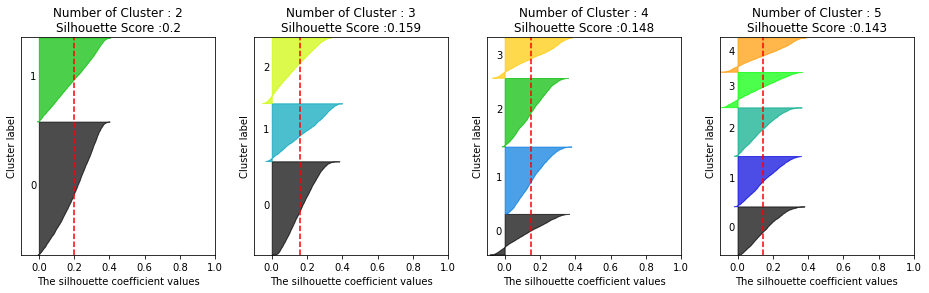

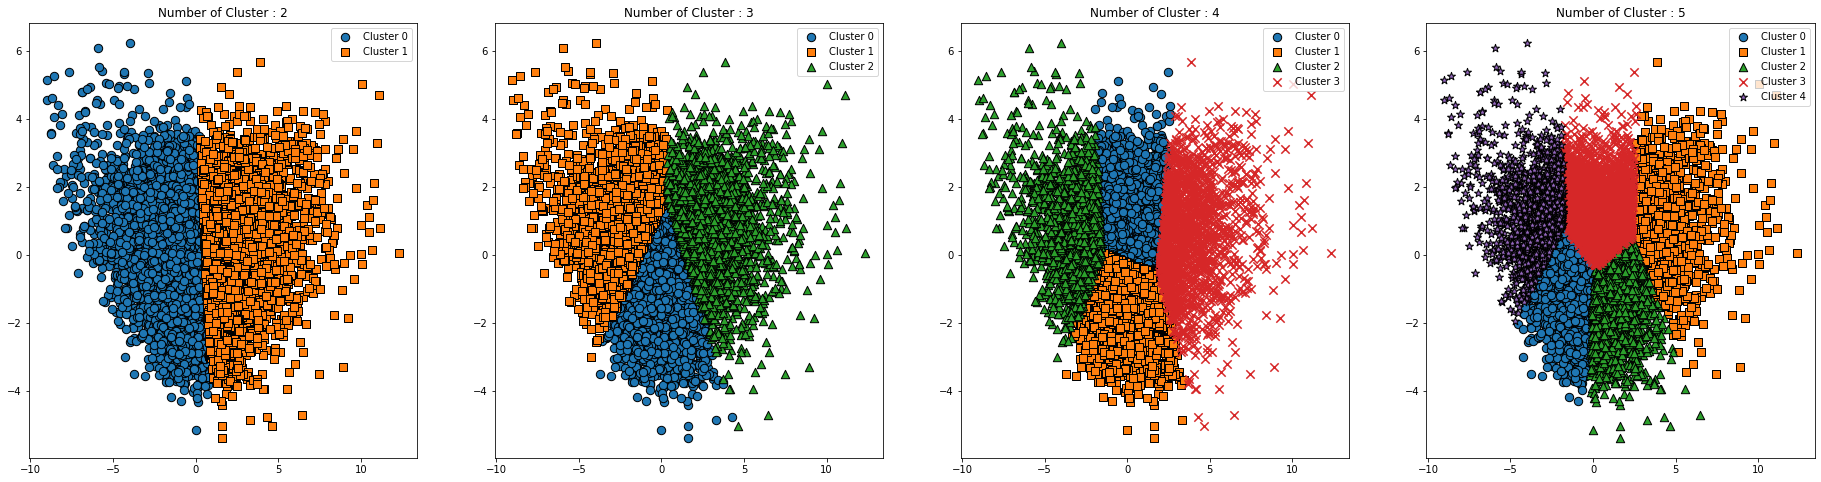

In [ ]:
visualize_silhouette([2,3,4,5],cluster_1.iloc[:,1:])
result=visualize_kmeans_plot_multi([2,3,4,5],cluster_1.iloc[:,1:])

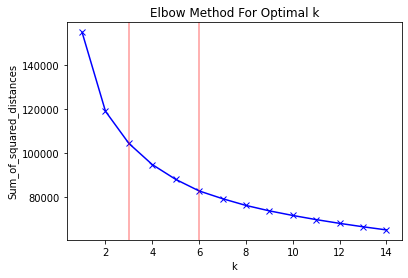

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_1.iloc[:,1:])
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(3,c= 'r',alpha =0.4)
plt.axvline(6,c= 'r',alpha =0.4)
plt.show()

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# 감소 고객 군집 평가
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline


kmeans = KMeans(n_clusters=5, max_iter=300,random_state=0).fit(cluster_1.iloc[:,1:])

cluster_1['유형'] = kmeans.labels_

# dc_feature_df_sil의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(cluster_1.iloc[:,1:], cluster_1['유형'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# dc_feature_df_sil에 실루엣 계수 컬럼 추가
cluster_1['실루엣계수'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(cluster_1.iloc[:,1:], cluster_1['유형'])
print('X 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

cluster_1.head()

<ipython-input-15-7c90b4146c14>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['유형'] = kmeans.labels_


silhouette_samples( ) return 값의 shape (9024,)


<ipython-input-15-7c90b4146c14>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['실루엣계수'] = score_samples


X 데이터셋 Silhouette Analysis Score:0.211


,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수
0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2,2,0.335040
1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4,2,0.148630
2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036
3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6,4,0.216958
4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2,2,0.238485


In [ ]:
cluster_1.groupby('유형')['성별'].count()

유형
0    1558
1    2000
2    2338
3    1232
4    1896
Name: 성별, dtype: int64

In [ ]:
cluster_1.groupby('유형').mean()

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,실루엣계수
유형,,,,,,,,,,,
0,8340.801027,0.820282,4.150193,3.029525,3.252246,3.757381,-0.548600,0.346824,3.285366,1.952632,0.174959
1,10472.190500,0.835500,4.002500,2.566500,1.598500,1.974500,-0.586267,0.551049,0.279500,0.830500,0.218279
2,7282.923867,0.825064,4.312660,2.042772,3.335329,4.563730,-0.843695,0.237846,0.446279,0.342258,0.230488
3,9792.915584,0.802760,3.896916,2.194805,3.205357,3.258117,-1.704834,0.457975,-2.176461,-1.555519,0.121159
4,10153.760549,0.824367,4.050105,3.942511,4.229430,2.474684,-0.514199,0.613080,0.062553,0.905274,0.267209


In [ ]:
cluster_1['실루엣계수'].describe()

count    9024.000000
mean        0.210984
std         0.104214
min        -0.082699
25%         0.140784
50%         0.216454
75%         0.289708
max         0.451465
Name: 실루엣계수, dtype: float64

In [ ]:
cluster_1['실루엣계수'].var()

0.010860577876636588

(array([ 112.,  298.,  623.,  990., 1522., 1642., 1632., 1342.,  670.,
         193.]),
 array([-0.08269853, -0.02928219,  0.02413415,  0.07755049,  0.13096682,
         0.18438316,  0.2377995 ,  0.29121584,  0.34463217,  0.39804851,
         0.45146485]),
 <a list of 10 Patch objects>)

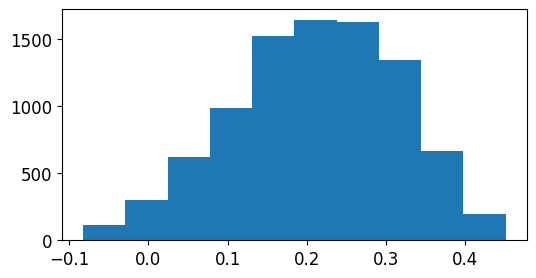

In [ ]:
plt.hist(cluster_1['실루엣계수'])

In [ ]:
data = cluster_1['실루엣계수']
data = sorted(data)
data_mean = sum(data) / len(data)

In [ ]:
sd = 0
for i in data:
    sd += (i - data_mean) ** 2
    
sd = math.sqrt(sd / len(data))

var = sd ** 2

In [ ]:
import math
y = []
for i in data:
    y.append((1 / math.sqrt(2 * np.pi * (sd ** 2))) * np.exp((-(i - data_mean) ** 2) / (2 * (sd ** 2))))

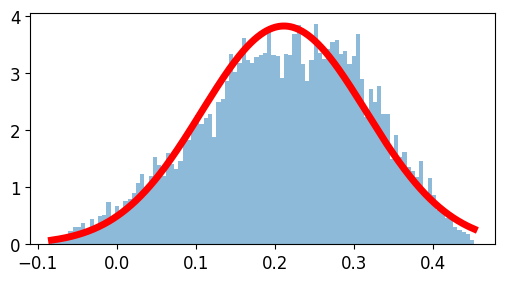

In [ ]:
fig, ax = plt.subplots()
ax.hist(data, bins=100, density=True, alpha=0.5)
ax.plot(data, y, 'r')


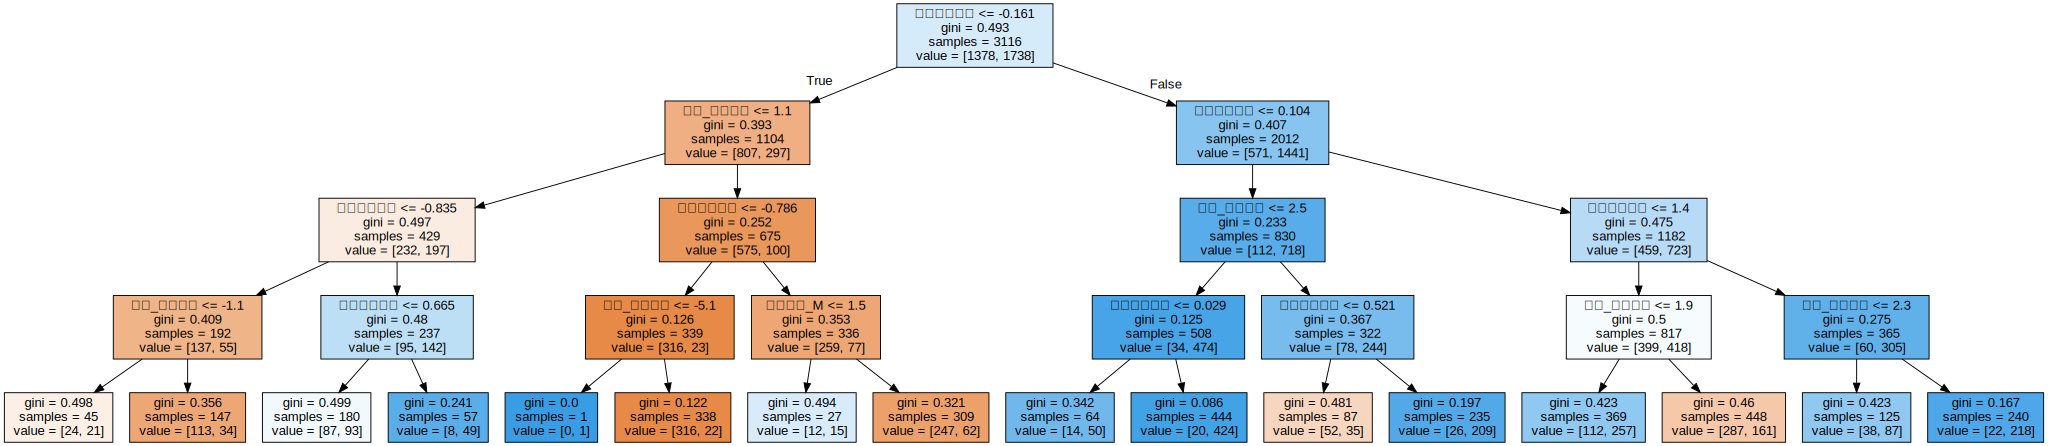

In [ ]:
# 0번군집 
a0=cluster_1[cluster_1['유형']==0]['고객번호'].tolist()
b0=train2[train2['고객번호'].isin(a0)].reset_index(drop=True)
label_1_list=cluster2.sample(len(a0))['고객번호'].tolist()
c0=train2[train2['고객번호'].isin(label_1_list)].reset_index(drop=True)
d0=pd.concat([b0,c0])

X_train = d0.loc[:, d0.columns != 'target']
X_train = X_train.iloc[:,1:]
y_train = d0[['target']]
best_dt_clf = DecisionTreeClassifier(max_depth=4)
best_dt_clf.fit(X_train, y_train)
import sklearn
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(best_dt_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

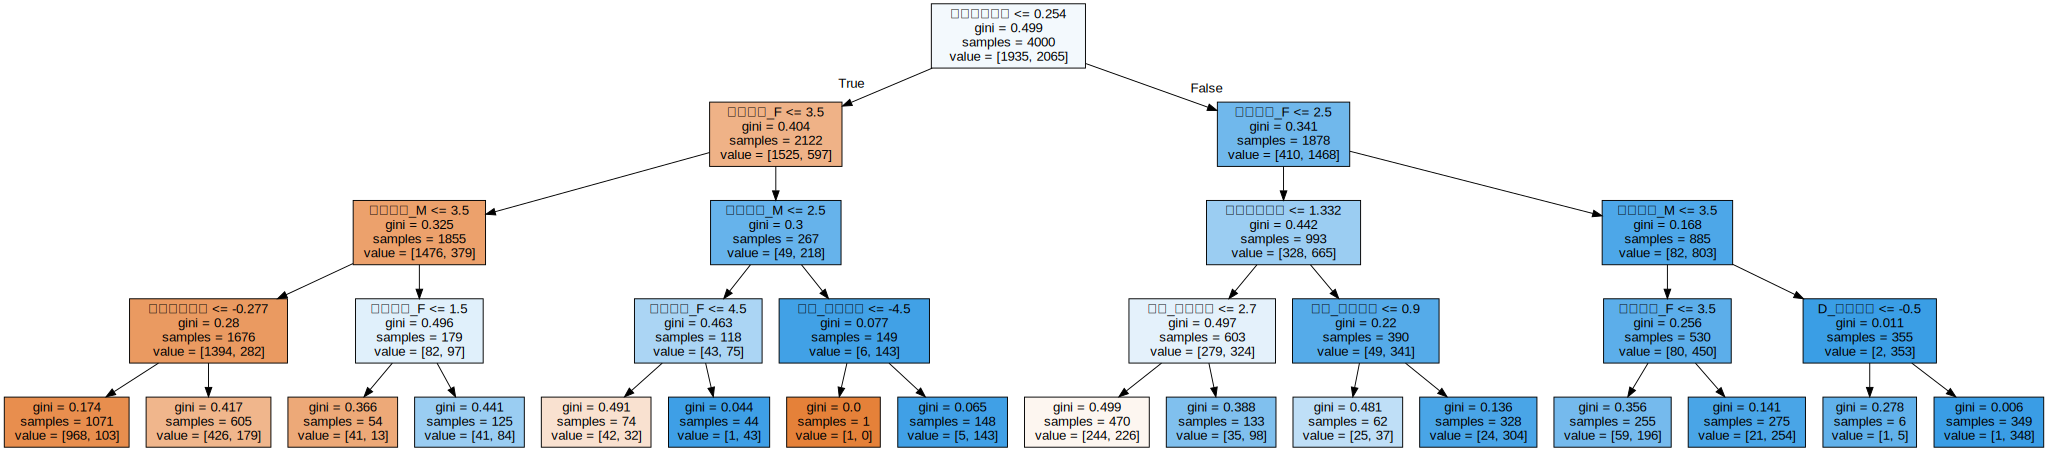

In [ ]:
# 1번군집 
a0=cluster_1[cluster_1['유형']==1]['고객번호'].tolist()
b0=train2[train2['고객번호'].isin(a0)].reset_index(drop=True)
label_1_list=cluster2.sample(len(a0))['고객번호'].tolist()
c0=train2[train2['고객번호'].isin(label_1_list)].reset_index(drop=True)
d0=pd.concat([b0,c0])

X_train = d0.loc[:, d0.columns != 'target']
X_train = X_train.iloc[:,1:]
y_train = d0[['target']]
best_dt_clf = DecisionTreeClassifier(max_depth=4)
best_dt_clf.fit(X_train, y_train)
import sklearn
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(best_dt_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


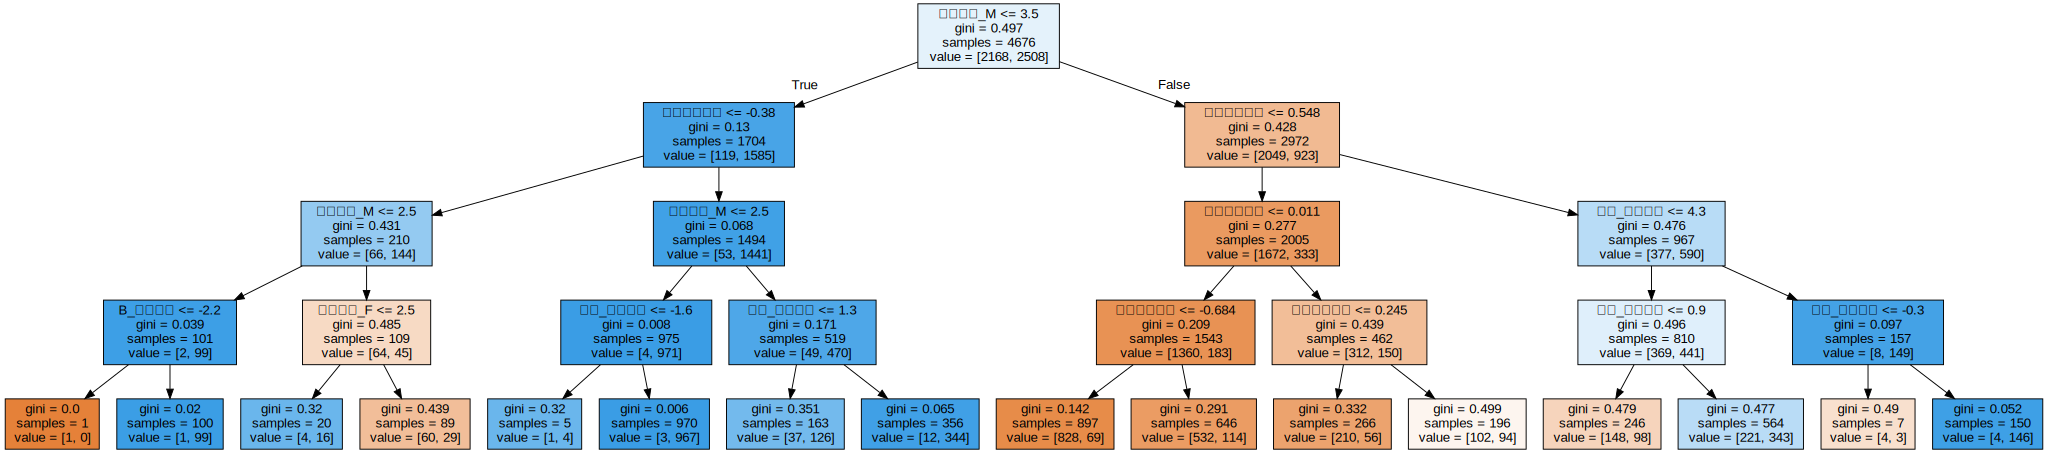

In [ ]:
# 2번군집 
a0=cluster_1[cluster_1['유형']==2]['고객번호'].tolist()
b0=train2[train2['고객번호'].isin(a0)].reset_index(drop=True)
label_1_list=cluster2.sample(len(a0))['고객번호'].tolist()
c0=train2[train2['고객번호'].isin(label_1_list)].reset_index(drop=True)
d0=pd.concat([b0,c0])

X_train = d0.loc[:, d0.columns != 'target']
X_train = X_train.iloc[:,1:]
y_train = d0[['target']]
best_dt_clf = DecisionTreeClassifier(max_depth=4)
best_dt_clf.fit(X_train, y_train)
import sklearn
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(best_dt_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

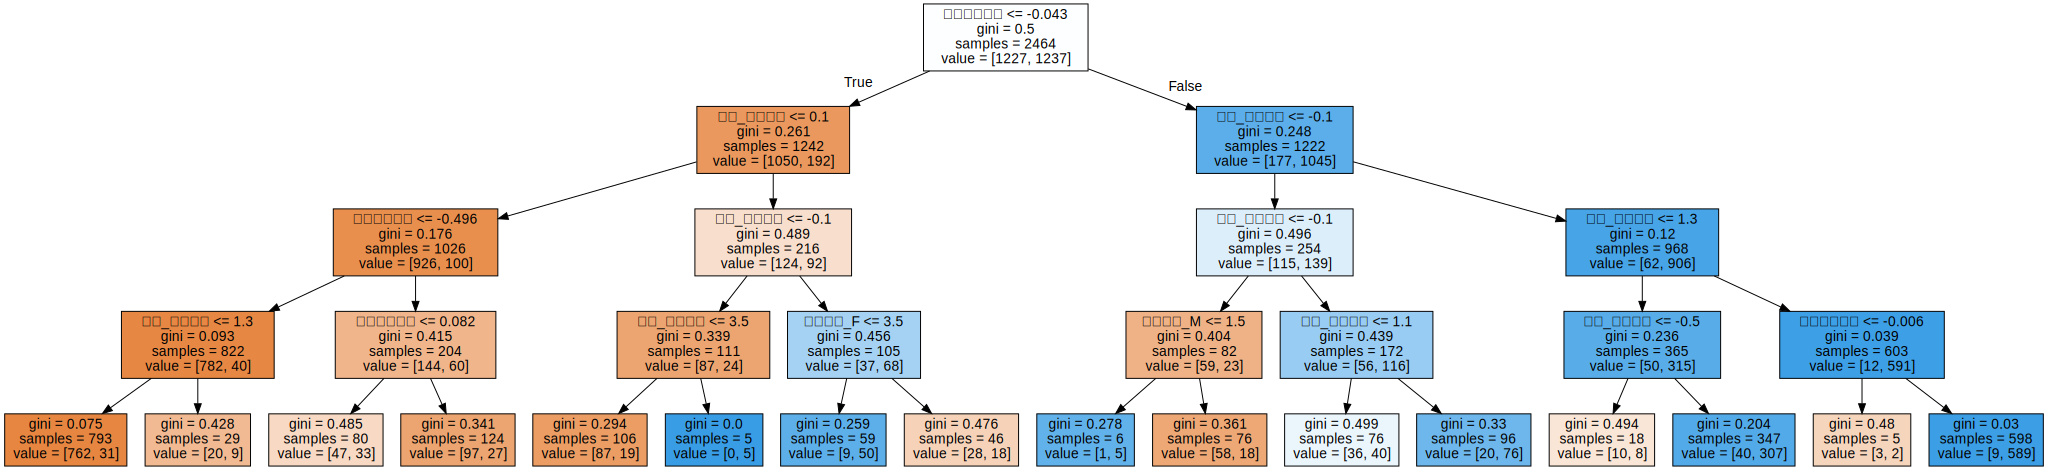

In [ ]:
# 3번군집 
a0=cluster_1[cluster_1['유형']==3]['고객번호'].tolist()
b0=train2[train2['고객번호'].isin(a0)].reset_index(drop=True)
label_1_list=cluster2.sample(len(a0))['고객번호'].tolist()
c0=train2[train2['고객번호'].isin(label_1_list)].reset_index(drop=True)
d0=pd.concat([b0,c0])

X_train = d0.loc[:, d0.columns != 'target']
X_train = X_train.iloc[:,1:]
y_train = d0[['target']]
best_dt_clf = DecisionTreeClassifier(max_depth=4)
best_dt_clf.fit(X_train, y_train)
import sklearn
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(best_dt_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

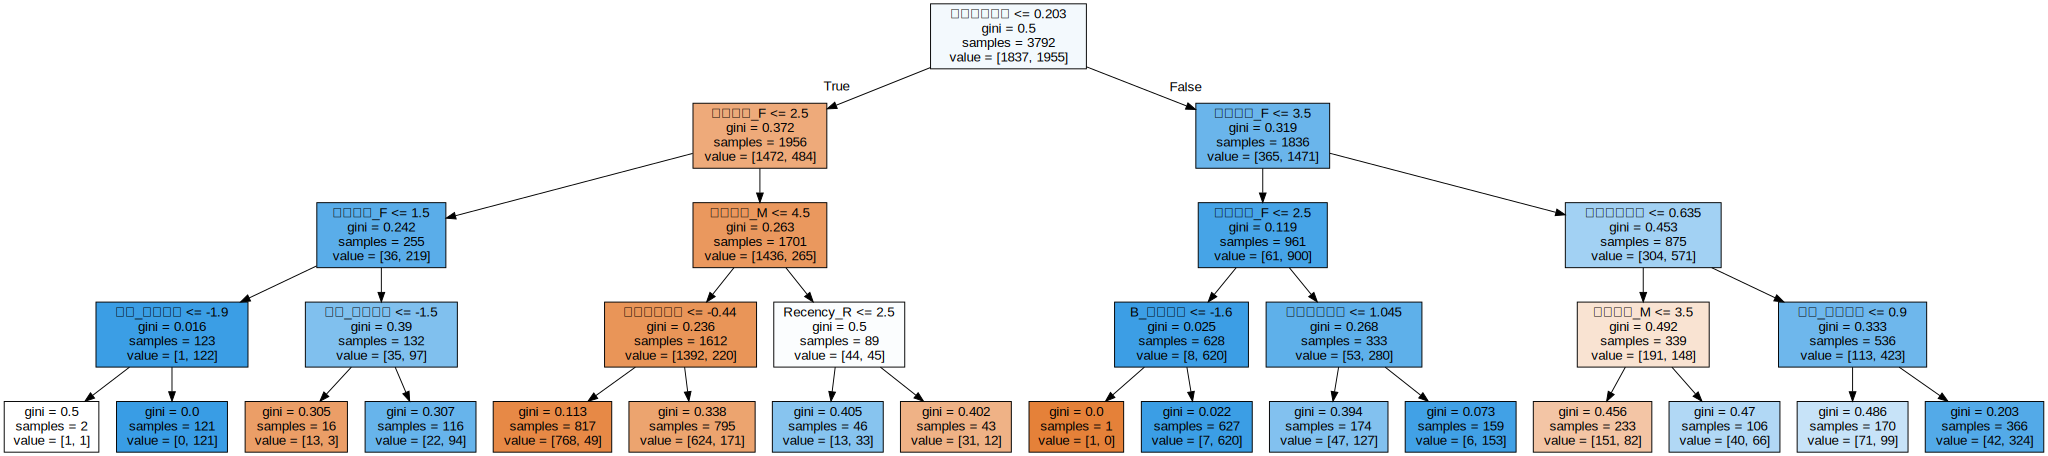

In [ ]:
# 4번군집 
a0=cluster_1[cluster_1['유형']==4]['고객번호'].tolist()
b0=train2[train2['고객번호'].isin(a0)].reset_index(drop=True)
label_1_list=cluster2.sample(len(a0))['고객번호'].tolist()
c0=train2[train2['고객번호'].isin(label_1_list)].reset_index(drop=True)
d0=pd.concat([b0,c0])

X_train = d0.loc[:, d0.columns != 'target']
X_train = X_train.iloc[:,1:]
y_train = d0[['target']]
best_dt_clf = DecisionTreeClassifier(max_depth=4)
best_dt_clf.fit(X_train, y_train)
import sklearn
import graphviz
# DOT data
dot_data = sklearn.tree.export_graphviz(best_dt_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
h=total[~total['분기'].isin([8])]
a=h[h['고객번호'].isin(cus_list)]
a

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
4390,1,101,A010101,일용잡화,위생세제,일상용품,1254647,177,31,20140120,17,8900,1,6,2.0,2014,저가,1,A
4391,1,101,A010101,일용잡화,위생세제,일상용품,1404262,177,31,20140218,17,5900,1,6,2.0,2014,저가,1,A
4392,1,101,A010101,일용잡화,위생세제,일상용품,3676115,177,31,20150209,14,3000,1,6,2.0,2015,저가,5,A
4393,1,101,A010101,일용잡화,위생세제,일상용품,3425163,177,31,20141230,10,24000,1,6,2.0,2014,중가,4,A
4395,1,101,A010103,일용잡화,뷰티상품,일상용품,4855699,177,31,20150804,15,2000,1,6,2.0,2015,저가,7,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592700,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C
28592701,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C
28592702,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C
28592703,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C


In [ ]:
cus_list=test2[test2['label']==0]['고객번호'].tolist()

In [ ]:
cluster_1.to_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster.csv')

In [ ]:
a.reset_index(inplace=True,drop=True)
a

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,1254647,177,31,20140120,17,8900,1,6,2.0,2014,저가,1,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1404262,177,31,20140218,17,5900,1,6,2.0,2014,저가,1,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3676115,177,31,20150209,14,3000,1,6,2.0,2015,저가,5,A
3,1,101,A010101,일용잡화,위생세제,일상용품,3425163,177,31,20141230,10,24000,1,6,2.0,2014,중가,4,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,4855699,177,31,20150804,15,2000,1,6,2.0,2015,저가,7,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472387,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C
11472388,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C
11472389,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C
11472390,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C


In [ ]:
cluster_11=cluster_1[['고객번호','유형']]
cluster_11

,고객번호,유형
0,1,2
1,2,2
2,7,2
3,10,4
4,11,2
...,...,...
9019,19314,2
9020,19325,0
9021,19327,4
9022,19333,4


In [ ]:
b=pd.merge(a,cluster_11)
b

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사,유형
0,1,101,A010101,일용잡화,위생세제,일상용품,1254647,177,31,20140120,17,8900,1,6,2.0,2014,저가,1,A,2
1,1,101,A010101,일용잡화,위생세제,일상용품,1404262,177,31,20140218,17,5900,1,6,2.0,2014,저가,1,A,2
2,1,101,A010101,일용잡화,위생세제,일상용품,3676115,177,31,20150209,14,3000,1,6,2.0,2015,저가,5,A,2
3,1,101,A010101,일용잡화,위생세제,일상용품,3425163,177,31,20141230,10,24000,1,6,2.0,2014,중가,4,A,2
4,1,101,A010103,일용잡화,뷰티상품,일상용품,4855699,177,31,20150804,15,2000,1,6,2.0,2015,저가,7,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472387,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C,3
11472388,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C,3
11472389,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C,3
11472390,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C,3


In [ ]:
b.to_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster_total.csv')

## 군집 분석

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cluster = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster.csv',index_col=0)
cluster

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수
0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2,2,0.335040
1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4,2,0.148630
2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036
3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6,4,0.216958
4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2,2,0.238485
...,...,...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,4,1,3,5,-1.194635,0.041125,-0.2,0.4,2,0.392426
9020,19325,1,4,2,3,3,-0.906757,0.352661,2.8,1.6,0,0.198347
9021,19327,0,5,1,5,1,-0.953285,0.878719,-2.2,1.6,4,0.123898
9022,19333,1,2,2,4,1,-1.377282,0.919496,-1.0,1.2,4,0.201445


In [ ]:
cluster.groupby('유형').mean()

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,실루엣계수
유형,,,,,,,,,,,
0,8340.801027,0.820282,4.150193,3.029525,3.252246,3.757381,-0.548600,0.346824,3.285366,1.952632,0.174959
1,10472.190500,0.835500,4.002500,2.566500,1.598500,1.974500,-0.586267,0.551049,0.279500,0.830500,0.218279
2,7282.923867,0.825064,4.312660,2.042772,3.335329,4.563730,-0.843695,0.237846,0.446279,0.342258,0.230488
3,9792.915584,0.802760,3.896916,2.194805,3.205357,3.258117,-1.704834,0.457975,-2.176461,-1.555519,0.121159
4,10153.760549,0.824367,4.050105,3.942511,4.229430,2.474684,-0.514199,0.613080,0.062553,0.905274,0.267209


In [ ]:
cluster_total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster_total.csv',index_col=0)
cluster_total

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사,유형
0,1,101,A010101,일용잡화,위생세제,일상용품,1254647,177,31,20140120,17,8900,1,6,2.0,2014,저가,1,A,2
1,1,101,A010101,일용잡화,위생세제,일상용품,1404262,177,31,20140218,17,5900,1,6,2.0,2014,저가,1,A,2
2,1,101,A010101,일용잡화,위생세제,일상용품,3676115,177,31,20150209,14,3000,1,6,2.0,2015,저가,5,A,2
3,1,101,A010101,일용잡화,위생세제,일상용품,3425163,177,31,20141230,10,24000,1,6,2.0,2014,중가,4,A,2
4,1,101,A010103,일용잡화,뷰티상품,일상용품,4855699,177,31,20150804,15,2000,1,6,2.0,2015,저가,7,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472387,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C,3
11472388,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C,3
11472389,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C,3
11472390,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C,3


### 성별 분포

In [ ]:
c_m=cluster_total.groupby(['고객번호','유형','성별'])[['구매금액']].sum().reset_index()
c_m

,고객번호,유형,성별,구매금액
0,1,2,0,79746612
1,2,2,0,87879540
2,7,2,1,58754626
3,10,4,1,16798202
4,11,2,0,109065419
...,...,...,...,...
9019,19314,2,1,228185290
9020,19325,0,1,12724408
9021,19327,4,0,7315470
9022,19333,4,1,4217068


In [ ]:
c_m['co'] = 1
c_m=c_m.pivot_table(index='유형',columns='성별',values='co',aggfunc='sum').reset_index()
c_m['합계'] = c_m[0]+c_m[1]
c_m

성별,유형,0,1,합계
0,0,280,1278,1558
1,1,329,1671,2000
2,2,409,1929,2338
3,3,243,989,1232
4,4,333,1563,1896


### 나이대 분포

In [ ]:
c_y=cluster_total.groupby(['고객번호','유형','연령대'])[['구매금액']].sum().reset_index()
c_y['co'] = 1
c_y=c_y.pivot_table(index = '유형',columns = '연령대',values='co',aggfunc='sum' ).reset_index()
c_y=c_y.replace(np.NaN,0)
c_y=c_y.astype('int')
c_y['합계']=c_y.iloc[:,1:].sum(axis=1)
c_y

연령대,유형,1,2,3,4,5,6,합계
0,0,0,51,358,592,420,137,1558
1,1,1,124,435,851,487,102,2000
2,2,0,40,427,882,740,249,2338
3,3,2,71,339,509,262,49,1232
4,4,2,65,422,830,501,76,1896


In [ ]:
c_y['30대_비율'] = c_y[3]/c_y['합계']
c_y['40대_비율'] = c_y[4]/c_y['합계']
c_y['50대_비율'] = c_y[5]/c_y['합계']
c_y

연령대,유형,1,2,3,4,5,6,합계,30대_비율,40대_비율,50대_비율
0,0,0,51,358,592,420,137,1558,0.229782,0.379974,0.269576
1,1,1,124,435,851,487,102,2000,0.217500,0.425500,0.243500
2,2,0,40,427,882,740,249,2338,0.182635,0.377246,0.316510
3,3,2,71,339,509,262,49,1232,0.275162,0.413149,0.212662
4,4,2,65,422,830,501,76,1896,0.222574,0.437764,0.264241


### 주요제휴사

In [ ]:
cluster_total.groupby(['유형','제휴사'])[['구매금액']].sum()

구매금액
유형 제휴사              
0  A     52624060440
   B      7454477644
   C      2026472319
   D        37077184
1  A      7422164390
   B     13094054909
   C      1151488585
   D       109514640
2  A    140937054190
   B     10105558259
   C      3345669216
   D        33222690
3  A     27248373650
   B      9041486840
   C      3045670636
   D        33193000
4  A     14554748120
   B      6822647281
   C     10067646629
   D        16135750

### 대분류 묶기

In [ ]:
cluster_total['대분류']=cluster_total['대분류'].replace(['가공식품','신선식품'],'식품')
cluster_total['대분류']=cluster_total['대분류'].replace(['의류','패션잡화'],'패션')
cluster_total['대분류']=cluster_total['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
cluster_total['대분류']=cluster_total['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')
cluster_total['대분류'].unique()

array(['일상용품', '식품', '취미', '패션', '주거', '음식점', '기타', '의약품/의료기기'],
      dtype=object)

### 대분류 비교

In [ ]:
c_c=cluster_total.groupby(['유형','대분류'])[['구매금액']].sum().reset_index()
c_c=c_c.pivot('유형','대분류','구매금액')

In [ ]:
c_c['합계']=c_c.sum(axis=1)
c_c

대분류,기타,식품,음식점,의약품/의료기기,일상용품,주거,취미,패션,합계
유형,,,,,,,,,
0,2602986220,14702619102,147844687,28940420,15328632402,3065666907,2634710665,23630687184,62142087587
1,822919883,11293263274,191495177,58307530,4794628880,731796358,892027270,2992784152,21777222524
2,6772505701,28644384247,128497378,44641570,41072375053,7880837770,6623438195,63254824441,154421504355
3,1214425891,14581671262,134636430,23919000,8717820859,1551295639,2007433223,11137521822,39368724126
4,635003308,15581874659,209419528,32262130,7316676395,1160629365,1046310563,5479001832,31461177780


In [ ]:
c_c_col=c_c.columns.to_list()
for i in c_c_col:
  b=i+'_'+'비율'
  c_c[b] = c_c[i]/c_c['합계']

In [ ]:
c_c.iloc[:,9:]

대분류,기타_비율,식품_비율,음식점_비율,의약품/의료기기_비율,일상용품_비율,주거_비율,취미_비율,패션_비율,합계_비율
유형,,,,,,,,,
0,0.041888,0.236597,0.002379,0.000466,0.246671,0.049333,0.042398,0.380269,1.0
1,0.037788,0.518581,0.008793,0.002677,0.220167,0.033604,0.040961,0.137427,1.0
2,0.043857,0.185495,0.000832,0.000289,0.265976,0.051035,0.042892,0.409624,1.0
3,0.030847,0.370387,0.003420,0.000608,0.221440,0.039404,0.050991,0.282903,1.0
4,0.020184,0.495273,0.006656,0.001025,0.232562,0.036891,0.033257,0.174151,1.0


In [ ]:
cluster.groupby('유형').mean()

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,실루엣계수
유형,,,,,,,,,,,
0,8340.801027,0.820282,4.150193,3.029525,3.252246,3.757381,-0.548600,0.346824,3.285366,1.952632,0.174959
1,10472.190500,0.835500,4.002500,2.566500,1.598500,1.974500,-0.586267,0.551049,0.279500,0.830500,0.218279
2,7282.923867,0.825064,4.312660,2.042772,3.335329,4.563730,-0.843695,0.237846,0.446279,0.342258,0.230488
3,9792.915584,0.802760,3.896916,2.194805,3.205357,3.258117,-1.704834,0.457975,-2.176461,-1.555519,0.121159
4,10153.760549,0.824367,4.050105,3.942511,4.229430,2.474684,-0.514199,0.613080,0.062553,0.905274,0.267209


### 고가 중가 저가 

In [ ]:
c_gjj=cluster_total.groupby(['유형','분류'])[['구매금액']].sum().reset_index()
c_gjj=c_gjj.pivot('유형','분류','구매금액')
c_gjj['합계']=c_gjj.sum(axis=1)
c_gjj

분류,고가,저가,중가,합계
유형,,,,
0,42065487195,5928873875,14147726517,62142087587
1,6961542108,6419940897,8395739519,21777222524
2,115827894368,9334911346,29258698641,154421504355
3,25521973622,4599830674,9246919830,39368724126
4,13048111468,7959142507,10453923805,31461177780


In [ ]:
c_gjj_col=c_gjj.columns.to_list()
for i in c_gjj_col:
  b=i+'_'+'비율'
  c_gjj[b] = c_gjj[i]/c_gjj['합계']

In [ ]:
c_gjj

분류,고가,저가,중가,합계,고가_비율,저가_비율,중가_비율,합계_비율
유형,,,,,,,,
0,42065487195,5928873875,14147726517,62142087587,0.676924,0.095408,0.227667,1.0
1,6961542108,6419940897,8395739519,21777222524,0.319671,0.294801,0.385528,1.0
2,115827894368,9334911346,29258698641,154421504355,0.750076,0.060451,0.189473,1.0
3,25521973622,4599830674,9246919830,39368724126,0.648280,0.116840,0.234880,1.0
4,13048111468,7959142507,10453923805,31461177780,0.414737,0.252983,0.332280,1.0


In [ ]:
115827894368/368393929946

0.3144131456915653

In [ ]:
9334911346/71836188987

0.12994719622012957

In [ ]:
29258698641/138197422793

0.2117166735071851

### 분기별 비교

In [ ]:
c_bb=cluster_total.groupby(['유형','분기'])[['영수증번호']].nunique().reset_index()
c_bb=c_bb.pivot('유형','분기','영수증번호')

In [ ]:
c_bb['합계']=c_bb.sum(axis=1)
c_bb

분기,1,2,3,4,5,6,7,합계
유형,,,,,,,,
0,95422,113499,111375,117969,114044,130500,132079,814888
1,111279,113698,111926,112267,105551,109331,100149,764201
2,177936,195293,178292,186407,168148,183884,157285,1247245
3,114607,113583,104124,99593,84148,72806,52231,641092
4,170458,175396,172722,168528,159073,165749,161535,1173461


In [ ]:
a_7=c_bb[7]
a_1=c_bb[1]
c_bb['분기영수증성장률']=(((a_7/a_1)**(1/6))-1)*100
c_bb

분기,1,2,3,4,5,6,7,합계,분기영수증성장률
유형,,,,,,,,,
0,95422,113499,111375,117969,114044,130500,132079,814888,5.567655
1,111279,113698,111926,112267,105551,109331,100149,764201,-1.741024
2,177936,195293,178292,186407,168148,183884,157285,1247245,-2.035082
3,114607,113583,104124,99593,84148,72806,52231,641092,-12.275776
4,170458,175396,172722,168528,159073,165749,161535,1173461,-0.892115


In [ ]:
c_db=cluster_total.groupby(['유형','대분류','분기'])[['구매금액']].mean().reset_index()
c_db=c_db.pivot('유형',['대분류','분기'],'구매금액')
c_db

대분류             기타                                               \
분기               1              2              3              4   
유형                                                                
0    133249.763600  104979.545206   98211.939348  210991.141292   
1     16209.585627   13529.958834   16875.810735   44886.676045   
2    263560.752914  168013.264480  184717.857692  253696.411560   
3     49406.125537   80171.662569   35320.357598  100763.499368   
4     23634.798826   20202.377836   25248.351762   54693.483475   

대분류                                                         식품                \
분기               5              6              7             1             2   
유형                                                                             
0    122114.846037  127176.968103   91822.081312  15385.381607  11579.290111   
1     39343.028102   38367.304486   31767.972527   6604.883578   6176.101964   
2    226446.038426  235821.337176  145933.646957  23368.606446  18811.612168   
3     92458.573745   84902.675240   64038.269733  14611.923753  16697.528143   
4     52853.264970   43683.999121   41302.569055   6270.964135   5676.898458   

대분류                ...             취미                              \
분기              3  ...              5             6             7   
유형                 ...                                              
0    12878.463098  ...   58822.335613  63884.097446  54969.786351   
1     6253.907912  ...   15372.996228  16823.792542  14547.046356   
2    19392.106607  ...  103262.628999  89979.318920  76861.667369   
3    15247.977948  ...   58998.048780  60873.592004  44805.948624   
4     5902.762093  ...   43615.907383  28683.990805  22643.383758   

대분류             패션                                               \
분기               1              2              3              4   
유형                                                                
0    335235.596465  197162.149668  178952.396173  293930.814385   
1     64448.642433   52853.466561   45248.266826   63266.411158   
2    357098.885760  245039.807024  245497.321169  359443.200783   
3    219295.246566  160321.117029  155473.274158  208644.222465   
4    117804.690107   87398.226595   80476.501229  128980.849426   

대분류                                               
분기               5              6              7  
유형                                                
0    245653.312529  183082.294461  146695.234318  
1     58606.889775   49900.611235   36055.841727  
2    347422.923040  268725.804530  214185.682904  
3    203120.130846  157145.283521  109428.253252  
4    130950.537366   94039.091868   69235.057998  

[5 rows x 56 columns]

In [ ]:
c_db['식품']

분기,1,2,3,4,5,6,7
유형,,,,,,,
0,15385.381607,11579.290111,12878.463098,12428.951671,11900.426187,10437.224636,11101.430002
1,6604.883578,6176.101964,6253.907912,6497.297183,6381.076862,5954.131561,6088.192189
2,23368.606446,18811.612168,19392.106607,17803.609061,19112.007778,15409.510371,17279.355867
3,14611.923753,16697.528143,15247.977948,11818.991892,10458.932258,8949.880888,9127.436824
4,6270.964135,5676.898458,5902.762093,6055.707528,6162.379878,5585.725090,5665.439273


In [ ]:
c_db=cluster_total.groupby(['유형','분류','분기'])[['영수증번호']].nunique().reset_index()
c_db.pivot('유형',['분류','분기'],'영수증번호')

분류     고가                                                저가                  \
분기      1      2      3      4      5      6      7       1       2       3   
유형                                                                            
0   23734  25916  24848  28027  26359  29157  28133   45585   56028   57636   
1   16393  14707  14671  15628  15106  15303  13973   80463   83217   83203   
2   59690  61103  54501  61255  54701  57613  45938   64247   74046   71198   
3   25503  22993  20465  20633  17244  14348   9041   64384   66424   62800   
4   20841  19505  19841  20148  19881  19355  18627  128225  134377  134024   

분류  ...                             중가                                     \
분기  ...       5       6       7      1      2      3      4      5      6   
유형  ...                                                                     
0   ...   57843   67052   70841  48524  56466  55311  60200  59128  65682   
1   ...   77898   81276   75204  61108  60557  58651  60528  57819  58571   
2   ...   63840   71208   65574  87534  94732  87115  90986  83187  89585   
3   ...   49792   43095   32317  58045  55439  50480  49242  42227  36141   
4   ...  120983  127970  126244  84625  82561  79668  80693  77327  77325   

분류         
분기      7  
유형         
0   65783  
1   53147  
2   77149  
3   25798  
4   72016  

[5 rows x 21 columns]

- 0번 1558명(남자 280 여자 1278)
 - 30대 22% 40대 37% 50대 26%(중년층)
   : 구매금액 -, 방문횟수 +, (10대x)
 - 주요 제휴사 A 
   :- 구매금액 -, 방문횟수 +
 - 총구매금액 62,142,087,587(2등) 
   : 평균구매금액 -, 방문횟수 +
 - 패션 38%, 식품 23% 일상용품 24% 
   : 구매금액 식품만 +, 방문횟수 식품,주거,일상용품 +
 - 고가 67% 중가 22% 저가 9%
   : 구매금액 저가만 +, 방문횟수 +
 - 분기별 평균 구매성장률 -5.4%
 - 분기별 구매횟수 성장률 5.5%(1분기에서 7분기로갈수록 고가물품은 감소하고 중,저가물품 구매건수가 늘어나 구매건수는 늘어낫지만 구매금액은 낮아짐)
 - 방문당 소비금액(2년) 76258

마케팅 제언 -> 이군집의 구매패턴을 살펴 보았을때 고가물품구매건수가 분기가 지날수록 가파르게 감소하고 중저가물품은 늘어나는것으로 보인다. 구매욕구는 있으나 고가물품에서 매력적인 상품이 없어서 구매가 감소하므로 고가물품을 최신유행에 맞춰 최신화하고 고가물품 사은품행사 마일리지적립 2배등의 이벤트로 구매촉진을 유도해보자 

- 1번 2000명(남자 329 여자 1671)
 - 30대 21% 40대 42% 50대 24%(중년층)
   : 구매금액 -, 방문횟수 -
 - 주요 제휴사 B (5개군집중 D제휴사 구매금액 가장높음)
   : 구매금액 -, 방문횟수 -
 - 총구매금액 21,777,222,524(5등)
   : 구매금액 - , 방문횟수 -
 - 패션 13%, 식품 51% 일상용품 22%
   : 구매금액 기타만+, 방문횟수 일상용품만+
 - 고가 31% 중가 38% 저가 29%
   : 구매금액 - , 방문횟수 -
 - 분기별 평균 구매성장률 -5.8%
 - 분기별 구매횟수 성장률 -1.7%
 - 방문당 소비금액(2년) 28496

마케팅 제언 -> 이군집의 구매패턴을 살펴 보았을때 식품군이 구매비중이 높다. 쿠x로켓배송을 벤치마킹해서 오늘구매한 식품이 내일 새벽에 도착하는 시스템을 구축해보자

- 2번 2338명(남자 409 여자 1929)
 - 30대 18% 40대 37% 50대 31%(중,장년층)
   : 구매금액 -, 방문횟수 -
 - 주요 제휴사 A
   : 구매금액 D만 +, 방문횟수 -
 - 패션 40%, 식품 18% 일상용품 26%
   : 구매금액 -, 방문횟수 -
 - 총구매금액 154,421,504,355(1등)
   : 구매금액 -, 방문횟수 -
 - 고가 75% 중가 18% 저가 6%(전체고가물품판매금중 31%구매함,전체중가물품판매금중21%구매함)
   : 구매금액 -, 방문횟수 저가만+
 - 분기별 평균 구매성장률 -8.4%
 - 분기별 구매횟수 성장률 -2.0%
 - 방문당 소비금액(2년) 123810

마케팅 제언 -> 전체매출로 보았을떄 매우 우수고객인 군집 VIP서비스와 비서서비스 1년 구매금액이 순위권일경우 선물증정을 해보자

- 3번 1232명(남자 243 여자 989)
 - 30대 27% 40대 41% 50대 21%(청,중년층)
   : 구매금액 -, 방문횟수 -
 - 주요 제휴사 A
   : 구매금액 -, 방문횟수 -
 - 패션 28%, 식품 37% 일상용품 22%
   : 구매금액 -, 방문횟수 -
 - 총구매금액 39368724126(3등)
   : 구매금액 -, 방문횟수 -
 - 고가 64% 중가 23% 저가 11%
   : 구매금액 -, 방문횟수 -
 - 분기별 평균 구매성장률 -17.0%
 - 분기별 구매횟수 성장률 -12.2%(모든 상품군에서 줄어들고있음)
 - 방문당 소비금액(2년) 61408

마케팅 제언 -> 마음이 떠나가는 고객으로 보임 모든지표가 급한폭으로 하락중 반복적인 상품노출로 상품구매유도, 인플루언서를 이용한 홍보, 행사진행시 문자 sns 메일로 지속적인 홍보

- 4번 1896명(남자 333 여자 1563)
 - 30대 22% 40대 43% 50대 26%(중년층)
   : 구매금액 -, 방문횟수 -
 - 주요 제휴사 A (5개군집중 C 제휴사 구매금액 가장높음)
   : 구매금액 -, 방문횟수 -
 - 패션 17%, 식품 49% 일상용품 23%
   : 구매금액 기타만+, 방문횟수 -
 - 총구매금액 31461177780(4등)
   : 구매금액 -, 방문횟수 -
 - 고가 61% 중가 33% 저가 25%
   : 구매금액 -, 방문횟수 -
 - 분기별 평균 구매성장률 -5.1%
 - 분기별 구매횟수 성장률 -0.89%
 - 방문당 소비금액(2년) 26810

마케팅 제언 -> 1번군집처럼 식품카테고리구매수치가 높지만 고가물품구매수치가 차이가 난다. 앞서본 군집들을 보면 이회사는 고가물품의 최신화가 잘진행되지 않는것같다. 고가물품 최신화를 진행하고 쿠x 로켓배송 시스템을 벤치마킹하자

- 0번마케팅 제언 -> 이군집의 구매패턴을 살펴 보았을때 고가물품구매건수가 분기가 지날수록 가파르게 감소하고 중저가물품은 늘어나는것으로 보인다. 구매욕구는 있으나 고가물품에서 매력적인 상품이 없어서 구매가 감소하므로 고가물품을 최신유행에 맞춰 최신화하고 고가물품 사은품행사 마일리지적립 2배등의 이벤트로 구매촉진을 유도해보자 

- 1번마케팅 제언 -> 이군집의 구매패턴을 살펴 보았을때 식품군이 구매비중이 높다. 쿠x로켓배송을 벤치마킹해서 오늘구매한 식품이 내일 새벽에 도착하는 시스템을 구축해보자

- 2번 마케팅 제언 -> 전체매출로 보았을떄 매우 우수고객인 군집 VIP서비스와 비서서비스 1년 구매금액이 순위권일경우 선물증정을 해보자

- 3번 마케팅 제언 -> 마음이 떠나가는 고객으로 보임 모든지표가 급한폭으로 하락중 반복적인 상품노출로 상품구매유도, 인플루언서를 이용한 홍보, 행사진행시 문자 sns 메일로 지속적인 홍보

- 4번 마케팅 제언 -> 1번군집처럼 식품카테고리구매수치가 높지만 고가물품구매수치가 차이가 난다. 앞서본 군집들을 보면 이회사는 고가물품의 최신화가 잘진행되지 않는것같다. 고가물품 최신화를 진행하고 쿠x 로켓배송 시스템을 벤치마킹하자